In [1]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
from pprint import pprint
from citipy import citipy
import time
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Google API Key
from config import (gkey,weather_api_key)


## Generate Cities List

In [2]:
lat= np.random.uniform(-90, 90, 50)
lng= np.random.uniform(-180, 180, 50)
lat_lng = list(zip(lat,lng))
#print(lat_lng)

city_list = []
lat=[]
lng=[]

for coordinate in lat_lng:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name
    #print(city)
    city_list.append(city)

print(city_list)

['ribeira grande', 'tuktoyaktuk', 'vostok', 'kavieng', 'punta arenas', 'tuktoyaktuk', 'yakeshi', 'punta arenas', 'qaanaaq', 'tasiilaq', 'ribeira grande', 'ribeira grande', 'port alfred', 'mahebourg', 'ushuaia', 'zhigansk', 'port alfred', 'bengkulu', 'mar del plata', 'muros', 'norsup', 'grand river south east', 'labuhan', 'bealanana', 'pacific grove', 'santa cruz', 'avarua', 'saskylakh', 'nanchang', 'busselton', 'lavrentiya', 'dudinka', 'bengkulu', 'maba', 'bambous virieux', 'mar del plata', 'micheweni', 'victoria', 'sosnovka', 'busselton', 'cabo san lucas', 'deputatskiy', 'albany', 'saint george', 'ponta do sol', 'kodiak', 'yellowknife', 'nantucket', 'punta arenas', 'hilo']


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}
city_name=[]
lat=[]
lng=[]
max_temp=[]
humidity=[]
cloudiness=[]
wind_speed=[]
country=[]
date=[]

base_url="https://api.openweathermap.org/data/2.5/weather?units=imperial&"
counter=0
set_counter = 1

print("Beginning Data Retrieval...")
print("----------------------------")

for city in city_list:
    counter=counter+1
    if counter==50:
        time.sleep(60)
        counter=0
        set_counter=set_counter+1
        
    query_url=f'{base_url}q={city}&appid={weather_api_key}'
    response_json=requests.get(query_url).json()
    print(f"Processing record {counter} of Set{set_counter} | {city} ")
    #pprint(response_json)
    try:
        max_temp.append(response_json['main']['temp_max'])
        humidity.append(response_json['main']['humidity'])
        cloudiness.append(response_json['clouds']['all'])
        wind_speed.append(response_json['wind']['speed'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])
        city_name.append(response_json['name'])
        lat.append(response_json['coord']['lat'])
        lng.append(response_json['coord']['lon'])
         
    except KeyError:
        print(f"{city} data not found. Skipping...")


Beginning Data Retrieval...
----------------------------
Processing record 1 of Set1 | ribeira grande 
Processing record 2 of Set1 | tuktoyaktuk 
Processing record 3 of Set1 | vostok 
Processing record 4 of Set1 | kavieng 
Processing record 5 of Set1 | punta arenas 
Processing record 6 of Set1 | tuktoyaktuk 
Processing record 7 of Set1 | yakeshi 
Processing record 8 of Set1 | punta arenas 
Processing record 9 of Set1 | qaanaaq 
Processing record 10 of Set1 | tasiilaq 
Processing record 11 of Set1 | ribeira grande 
Processing record 12 of Set1 | ribeira grande 
Processing record 13 of Set1 | port alfred 
Processing record 14 of Set1 | mahebourg 
Processing record 15 of Set1 | ushuaia 
Processing record 16 of Set1 | zhigansk 
Processing record 17 of Set1 | port alfred 
Processing record 18 of Set1 | bengkulu 
Processing record 19 of Set1 | mar del plata 
Processing record 20 of Set1 | muros 
Processing record 21 of Set1 | norsup 
Processing record 22 of Set1 | grand river south east 
gra

In [4]:
weather_data_DF = pd.DataFrame({"City": city_name,
                              "Lat": lat,
                              "Lng": lng,
                              "Max temp": max_temp,
                              "Humidity": humidity,
                              "Cloudiness":cloudiness,
                              "Wind Speed": wind_speed,
                              "Country": country,
                              "Date": date
                               })
weather_data_DF  

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.5167,-28.7000,59.00,63,75,13.80,PT,1610198195
1,Tuktoyaktuk,69.4541,-133.0374,12.52,92,100,9.71,CA,1610198196
2,Vostok,46.4856,135.8833,-19.46,88,100,2.80,RU,1610198198
3,Kavieng,-2.5744,150.7967,82.83,75,100,9.55,PG,1610198199
4,Punta Arenas,-53.1500,-70.9167,50.00,57,75,12.66,CL,1610198037
5,Tuktoyaktuk,69.4541,-133.0374,12.52,92,100,9.71,CA,1610198196
6,Yakeshi,49.2833,120.7333,-21.48,87,0,2.21,CN,1610198202
7,Punta Arenas,-53.1500,-70.9167,50.00,57,75,12.66,CL,1610198037
8,Qaanaaq,77.4840,-69.3632,-0.92,79,71,5.95,GL,1610198204
9,Tasiilaq,65.6145,-37.6368,14.00,57,40,3.44,GL,1610198205


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_data_DF.to_csv("Output/weather_data.csv",index=True, header=True)
weather_data_DF

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.5167,-28.7000,59.00,63,75,13.80,PT,1610198195
1,Tuktoyaktuk,69.4541,-133.0374,12.52,92,100,9.71,CA,1610198196
2,Vostok,46.4856,135.8833,-19.46,88,100,2.80,RU,1610198198
3,Kavieng,-2.5744,150.7967,82.83,75,100,9.55,PG,1610198199
4,Punta Arenas,-53.1500,-70.9167,50.00,57,75,12.66,CL,1610198037
5,Tuktoyaktuk,69.4541,-133.0374,12.52,92,100,9.71,CA,1610198196
6,Yakeshi,49.2833,120.7333,-21.48,87,0,2.21,CN,1610198202
7,Punta Arenas,-53.1500,-70.9167,50.00,57,75,12.66,CL,1610198037
8,Qaanaaq,77.4840,-69.3632,-0.92,79,71,5.95,GL,1610198204
9,Tasiilaq,65.6145,-37.6368,14.00,57,40,3.44,GL,1610198205


In [6]:
weather_data_DF.describe()

,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Date
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,4.900000e+01
mean,16.469112,1.054914,43.537143,73.938776,53.408163,8.204490,1.610198e+09
std,41.508082,101.381328,35.112030,14.409789,41.358654,4.522132,1.167826e+02
min,-54.800000,-171.000000,-28.770000,29.000000,0.000000,1.010000,1.610198e+09
25%,-20.342800,-70.916700,14.000000,64.000000,1.000000,4.610000,1.610198e+09
50%,24.684100,-17.100000,51.800000,78.000000,59.000000,9.220000,1.610198e+09
75%,49.283300,112.205100,75.720000,85.000000,99.000000,11.500000,1.610198e+09
max,77.484000,167.383300,84.990000,96.000000,100.000000,17.380000,1.610198e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%.

In [7]:
clean_city_data= weather_data_DF.loc[weather_data_DF['Humidity']<=100,:]
clean_city_data

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.5167,-28.7000,59.00,63,75,13.80,PT,1610198195
1,Tuktoyaktuk,69.4541,-133.0374,12.52,92,100,9.71,CA,1610198196
2,Vostok,46.4856,135.8833,-19.46,88,100,2.80,RU,1610198198
3,Kavieng,-2.5744,150.7967,82.83,75,100,9.55,PG,1610198199
4,Punta Arenas,-53.1500,-70.9167,50.00,57,75,12.66,CL,1610198037
5,Tuktoyaktuk,69.4541,-133.0374,12.52,92,100,9.71,CA,1610198196
6,Yakeshi,49.2833,120.7333,-21.48,87,0,2.21,CN,1610198202
7,Punta Arenas,-53.1500,-70.9167,50.00,57,75,12.66,CL,1610198037
8,Qaanaaq,77.4840,-69.3632,-0.92,79,71,5.95,GL,1610198204
9,Tasiilaq,65.6145,-37.6368,14.00,57,40,3.44,GL,1610198205


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

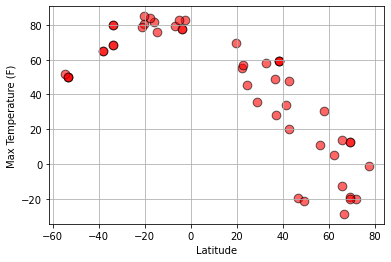

In [8]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Max temp'],marker ="o",c="red",edgecolors="black",s=75, alpha=0.6)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

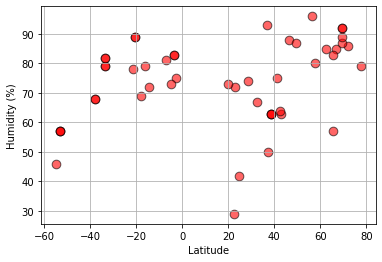

In [9]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Humidity'],marker ="o",c="red",edgecolors="black",s=75, alpha=0.6)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

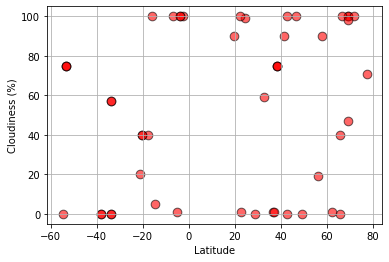

In [10]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Cloudiness'],marker ="o",c="red",edgecolors="black",s=75, alpha=0.6)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

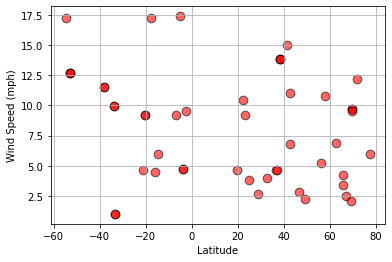

In [11]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Wind Speed'],marker ="o",c="red",edgecolors="black",s=75, alpha=0.6)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.show()

## Linear Regression

In [12]:
clean_city_data

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.5167,-28.7000,59.00,63,75,13.80,PT,1610198195
1,Tuktoyaktuk,69.4541,-133.0374,12.52,92,100,9.71,CA,1610198196
2,Vostok,46.4856,135.8833,-19.46,88,100,2.80,RU,1610198198
3,Kavieng,-2.5744,150.7967,82.83,75,100,9.55,PG,1610198199
4,Punta Arenas,-53.1500,-70.9167,50.00,57,75,12.66,CL,1610198037
5,Tuktoyaktuk,69.4541,-133.0374,12.52,92,100,9.71,CA,1610198196
6,Yakeshi,49.2833,120.7333,-21.48,87,0,2.21,CN,1610198202
7,Punta Arenas,-53.1500,-70.9167,50.00,57,75,12.66,CL,1610198037
8,Qaanaaq,77.4840,-69.3632,-0.92,79,71,5.95,GL,1610198204
9,Tasiilaq,65.6145,-37.6368,14.00,57,40,3.44,GL,1610198205


In [13]:
NH_data=clean_city_data.loc[clean_city_data['Lat']>=0,:]
NH_data

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.5167,-28.7000,59.00,63,75,13.80,PT,1610198195
1,Tuktoyaktuk,69.4541,-133.0374,12.52,92,100,9.71,CA,1610198196
2,Vostok,46.4856,135.8833,-19.46,88,100,2.80,RU,1610198198
5,Tuktoyaktuk,69.4541,-133.0374,12.52,92,100,9.71,CA,1610198196
6,Yakeshi,49.2833,120.7333,-21.48,87,0,2.21,CN,1610198202
8,Qaanaaq,77.4840,-69.3632,-0.92,79,71,5.95,GL,1610198204
9,Tasiilaq,65.6145,-37.6368,14.00,57,40,3.44,GL,1610198205
10,Ribeira Grande,38.5167,-28.7000,59.00,63,75,13.80,PT,1610198195
11,Ribeira Grande,38.5167,-28.7000,59.00,63,75,13.80,PT,1610198195
15,Zhigansk,66.7697,123.3711,-28.77,85,100,2.51,RU,1610197915


In [23]:
SH_data=clean_city_data.loc[clean_city_data['Lat']<0,:]
SH_data

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind Speed,Country,Date
3,Kavieng,-2.5744,150.7967,82.83,75,100,9.55,PG,1610198199
4,Punta Arenas,-53.1500,-70.9167,50.00,57,75,12.66,CL,1610198037
7,Punta Arenas,-53.1500,-70.9167,50.00,57,75,12.66,CL,1610198037
12,Port Alfred,-33.5906,26.8910,80.01,79,0,1.01,ZA,1610197927
13,Mahébourg,-20.4081,57.7000,80.60,89,40,9.22,MU,1610197930
14,Ushuaia,-54.8000,-68.3000,51.80,46,0,17.27,AR,1610197905
16,Port Alfred,-33.5906,26.8910,80.01,79,0,1.01,ZA,1610197927
17,Bengkulu,-3.8004,102.2655,77.49,83,100,4.70,ID,1610198214
18,Mar del Plata,-38.0023,-57.5575,64.99,68,0,11.50,AR,1610198215
20,Norsup,-16.0667,167.3833,81.46,79,100,4.50,VU,1610198217


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.637500096390908


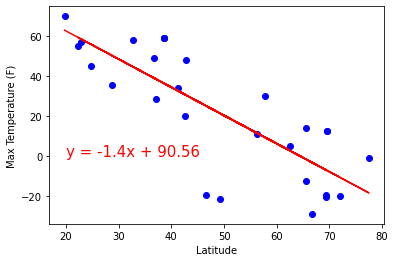

In [24]:
x_values=NH_data['Lat']
y_values=NH_data['Max temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker ="o",c="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,0),fontsize=15,color="red") 
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-value is: {rvalue**2}")
plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7387331146866588


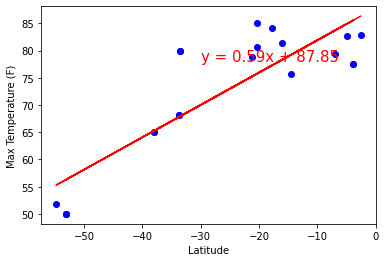

In [25]:
x_values=SH_data['Lat']
y_values=SH_data['Max temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker ="o",c="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,78),fontsize=15,color="red") 
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3730050119397654


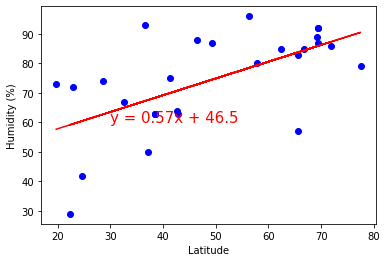

In [26]:
x_values=NH_data['Lat']
y_values=NH_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker ="o",c="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,60),fontsize=15,color="red") 
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.48878966064415164


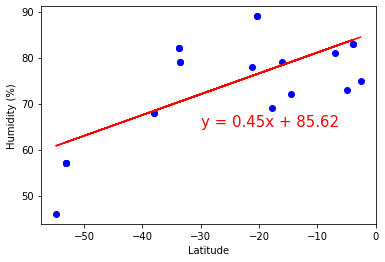

In [27]:
x_values=SH_data['Lat']
y_values=SH_data['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker ="o",c="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,65),fontsize=15,color="red") 
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.015625862012169464


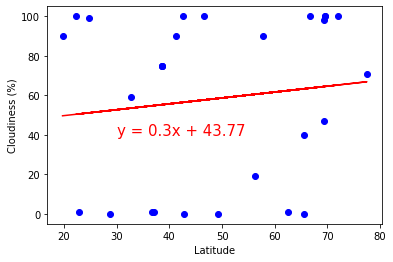

In [28]:
x_values=NH_data['Lat']
y_values=NH_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker ="o",c="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,40),fontsize=15,color="red") 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.08590844007276313


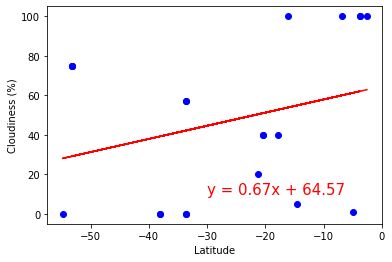

In [29]:
x_values=SH_data['Lat']
y_values=SH_data['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker ="o",c="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red") 
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0030446337932359185


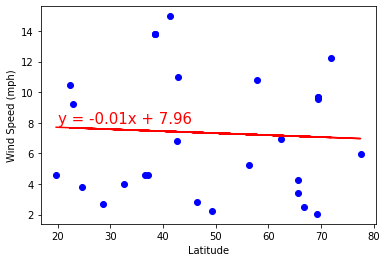

In [30]:
x_values=NH_data['Lat']
y_values=NH_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker ="o",c="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,8),fontsize=15,color="red") 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.08893625877781881


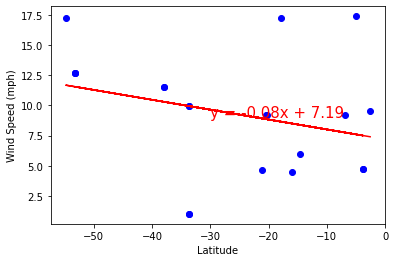

In [31]:
x_values=SH_data['Lat']
y_values=SH_data['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker ="o",c="blue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,9),fontsize=15,color="red") 
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
print(f"The r-value is: {rvalue**2}")
plt.show()